<div style="
    background: linear-gradient(to right, #ffe0b2, #ffcc80); /* Warm gradient colors */
    padding: 10px;   
    border-radius: 15px;  
    color: #d17f00; /* Deep orange */
    font-weight: bold;   
    text-align: center;  
    font-size: 24px;   
    font-family: 'Arial', sans-serif;  
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);  
    transition: transform 0.3s ease;  
">  
    <h1 style="margin: 0; font-size: 26px; text-align: center;">COVID-19 Global Impact Analysis</h1>  
    <p style="margin: 5px 0 0 0; font-size: 16px; text-align: center;">Introduction</p>  
</div>



The COVID-19 pandemic, which emerged in late 2019, reshaped global health systems, economies, and societal structures in unprecedented ways. As we now have over five years of comprehensive data, we are uniquely positioned to conduct a retrospective analysis that can inform future pandemic preparedness and response strategies.

This project aims to analyze the World Health Organization's COVID-19 surveillance data to extract meaningful insights about transmission patterns, mortality rates, and regional variations throughout the course of the pandemic. By examining both daily and weekly datasets spanning the entire pandemic timeline, we can identify critical inflection points, evaluate intervention effectiveness, and better understand the complex dynamics that drove this global health crisis.

The significance of this analysis extends beyond academic interest. The patterns revealed through comprehensive data analysis can guide:

1. **Future pandemic preparedness protocols** by identifying early warning signals  
2. **Resource allocation frameworks** based on regional vulnerability patterns  
3. **Intervention strategy optimization** through comparative effectiveness analysis  
4. **Public health communication approaches** informed by data-driven insights  

Our analysis leverages two primary datasets from the World Health Organization: a comprehensive daily dataset containing 472,560 entries and a weekly aggregated dataset with 67,680 entries. Both datasets track key metrics including new cases, cumulative cases, new deaths, and cumulative deaths across all WHO regions from the pandemic's beginning through its various phases.

Through rigorous statistical analysis, innovative visualization techniques, and careful interpretation, this project seeks to transform raw epidemiological data into actionable intelligence for global health stakeholders. The insights generated will contribute to the growing body of knowledge that will help humanity better prepare for and respond to future pandemic threats.

In the following sections, we will explore the methodology employed, present key findings through detailed visualizations, and offer evidence-based recommendations derived from our analysis of one of the most significant global health events of the 21st century.

## Importing Required Libraries
> This section imports all necessary libraries for data manipulation, 
visualization, geospatial analysis, statistical & time series analysis, 
and machine learning. It also sets up environment configurations for 
consistent, readable outputs and suppresses irrelevant warnings.

In [1]:
#  DATA MANIPULATION LIBRARIES 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# ========== DATA VISUALIZATION LIBRARIES ==========
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ========== GEOSPATIAL ANALYSIS LIBRARIES ==========
import geopandas as gpd
import folium
from folium.plugins import HeatMap, MarkerCluster

# ========== STATISTICAL ANALYSIS LIBRARIES ==========
import scipy.stats as stats
from scipy.signal import find_peaks
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ========== TIME SERIES ANALYSIS LIBRARIES ==========
from prophet import Prophet

# ========== MACHINE LEARNING LIBRARIES ==========
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ========== UTILITY LIBRARIES ==========
import os
import warnings
import json
import re

# ========== CONFIGURATION SETTINGS ==========
# Set plot aesthetics for consistent, publication-ready visuals
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')
sns.set_context('notebook', font_scale=1.2)

# Suppress common non-critical warnings for a cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Display settings for better DataFrame visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

# Confirm successful import and configuration
print(f"Libraries imported successfully - Analysis initiated by {os.environ.get('USER', 'AdilShamim8')} at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully - Analysis initiated by AdilShamim8 at 2025-06-12 14:42:44


/tmp/ipykernel_35/1956615454.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Data Loading and Initial Exploration

### Dataset Structure

Both datasets used in this analysis contain identical columns, allowing for seamless comparative and time-based analyses. Below is a brief description of each column:

- **`Date_reported`**: The reporting date for the data entry.
- **`Country_code`**: The ISO code corresponding to each country.
- **`Country`**: The official name of the country.
- **`WHO_region`**: The World Health Organization-defined region to which the country belongs.
- **`New_cases`**: The number of new COVID-19 cases reported during the given period (daily or weekly).
- **`Cumulative_cases`**: The running total of COVID-19 cases reported up to that date.
- **`New_deaths`**: The number of new COVID-19 deaths reported during the given period.
- **`Cumulative_deaths`**: The running total of COVID-19 deaths reported up to that date.

> *These columns provide a comprehensive foundation for analyzing temporal and geographical patterns in COVID-19 transmission and outcomes. In the next steps, we will load these datasets and begin our exploratory analysis.*

In [ ]:
# ---------- LOAD DATASETS ----------
# This section loads the WHO COVID-19 daily and weekly datasets,
# previews their structure, and provides basic metadata to orient the analysis.
print(f"Loading datasets - initiated at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Load daily and weekly COVID-19 data from WHO
daily_data = pd.read_csv('WHO-COVID-19-global-daily-data.csv')
weekly_data = pd.read_csv('WHO-COVID-19-global-data.csv')

Loading datasets - initiated at 2025-06-12 14:42:44


In [3]:
# DAILY DATASET PREVIEW 
daily_data.head()

Date_reported Country_code                           Country WHO_region  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
0    2020-01-04           VC  Saint Vincent and the Grenadines        AMR        NaN                 0         NaN                  0
1    2020-01-04           SN                           Senegal        AFR        NaN                 0         NaN                  0
2    2020-01-04           SB                   Solomon Islands        WPR       0.00                 0        0.00                  0
3    2020-01-04           LK                         Sri Lanka       SEAR       0.00                 0        0.00                  0
4    2020-01-04           SY              Syrian Arab Republic        EMR        NaN                 0         NaN                  0

In [4]:
# WEEKLY DATASET PREVIEW
display(weekly_data.head())

Date_reported Country_code      Country WHO_region  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
0    2020-01-05           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
1    2020-01-12           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
2    2020-01-19           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
3    2020-01-26           AF  Afghanistan       EMRO        NaN                 0         NaN                  0
4    2020-02-02           AF  Afghanistan       EMRO        NaN                 0         NaN                  0

In [5]:
# ---------- DATASET OVERVIEW ----------
print(f"Daily Dataset: {daily_data.shape[0]:,} rows × {daily_data.shape[1]} columns")
print(f"Weekly Dataset: {weekly_data.shape[0]:,} rows × {weekly_data.shape[1]} columns")

Daily Dataset: 472,560 rows × 8 columns
Weekly Dataset: 67,680 rows × 8 columns


In [6]:
# List columns for reference.
print("\nColumns in both datasets:")
for col in daily_data.columns:
    print(f"- {col}")


Columns in both datasets:
- Date_reported
- Country_code
- Country
- WHO_region
- New_cases
- Cumulative_cases
- New_deaths
- Cumulative_deaths


In [7]:
# ---------- DATASET INFO ----------
print("\nDAILY DATASET INFORMATION")
daily_data.info()

print("\nWEEKLY DATASET INFORMATION")
weekly_data.info()


DAILY DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472560 entries, 0 to 472559
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      472560 non-null  object 
 1   Country_code       470591 non-null  object 
 2   Country            472560 non-null  object 
 3   WHO_region         472560 non-null  object 
 4   New_cases          209256 non-null  float64
 5   Cumulative_cases   472560 non-null  int64  
 6   New_deaths         153448 non-null  float64
 7   Cumulative_deaths  472560 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 28.8+ MB

WEEKLY DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67680 entries, 0 to 67679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      67680 non-null  object 
 1   Country_code       67398 

In [8]:
# ---------- DATASET TIME RANGE ----------
# Convert 'Date_reported' columns to datetime for analysis
daily_data['Date_reported'] = pd.to_datetime(daily_data['Date_reported'])
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])

print(f"\nDaily dataset spans from {daily_data['Date_reported'].min().date()} to {daily_data['Date_reported'].max().date()}")
print(f"Weekly dataset spans from {weekly_data['Date_reported'].min().date()} to {weekly_data['Date_reported'].max().date()}")


Daily dataset spans from 2020-01-04 to 2025-05-25
Weekly dataset spans from 2020-01-05 to 2025-05-25


In [9]:
print(f"Number of countries in Daily Dataset: {daily_data['Country'].nunique()}")
print(f"Number of countries in Weekly Dataset: {weekly_data['Country'].nunique()}")

Number of countries in Daily Dataset: 240
Number of countries in Weekly Dataset: 240


## Dataset Analysis and Implications

Based on our initial exploration, the WHO COVID-19 dataset offers a robust and comprehensive foundation for global pandemic analysis. Here are some key observations and implications:

1. **Temporal Coverage**  
   The dataset spans the entire pandemic period, permitting a complete analysis of COVID-19’s progression—from the initial outbreak, through multiple waves, to eventual stabilization.

2. **Geographical Scope**  
   Inclusion of all WHO regions and member countries enables rich global comparisons and the identification of region-specific patterns.

3. **Data Granularity**  
   The availability of both daily and weekly records allows for flexible analysis:  
   - *Daily data* reveals detailed short-term patterns and volatility.  
   - *Weekly data* is ideal for smoothed, long-term trend analysis.

4. **Data Quality Considerations**
   - Some `New_cases` and `New_deaths` entries are null, which may reflect either days with no reporting or delays—important to handle thoughtfully during analysis.
   - Occasional missing `Country_code` and `WHO_region` values suggest the need for standardization or imputation in some analyses.
   - `Cumulative_cases` and `Cumulative_deaths` are complete and can be used as reliable reference points for validation.

5. **Analytical Potential**  
   The structure of these datasets supports a wide range of analyses, including:
   - Time series analysis to track pandemic waves and inflection points
   - Regional comparisons of outbreak severity, timing, and mortality
   - Calculation and comparison of case fatality rates
   - Detection of reporting anomalies and assessment of data consistency


# Data Analysis & Visualization

> **Note:** Recovery figures, where presented, are estimated based on typical recovery rates and are not official WHO data.

*In the following sections, we will leverage this dataset to extract meaningful insights through rigorous analysis and visualization.*

## Data Preparation & Global Trend Analysis
> This section prepares the weekly dataset for analysis and visualizes
global COVID-19 case and death trends using moving averages and peak detection.

In [10]:
# Ensure the date column is in datetime format
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])

# Sort data by country and date (important for time series consistency)
weekly_data = weekly_data.sort_values(['Country', 'Date_reported'])

# Copy the cleaned data for further analysis to preserve the original
covid_weekly = weekly_data.copy()

Analyzing global COVID-19 trends...


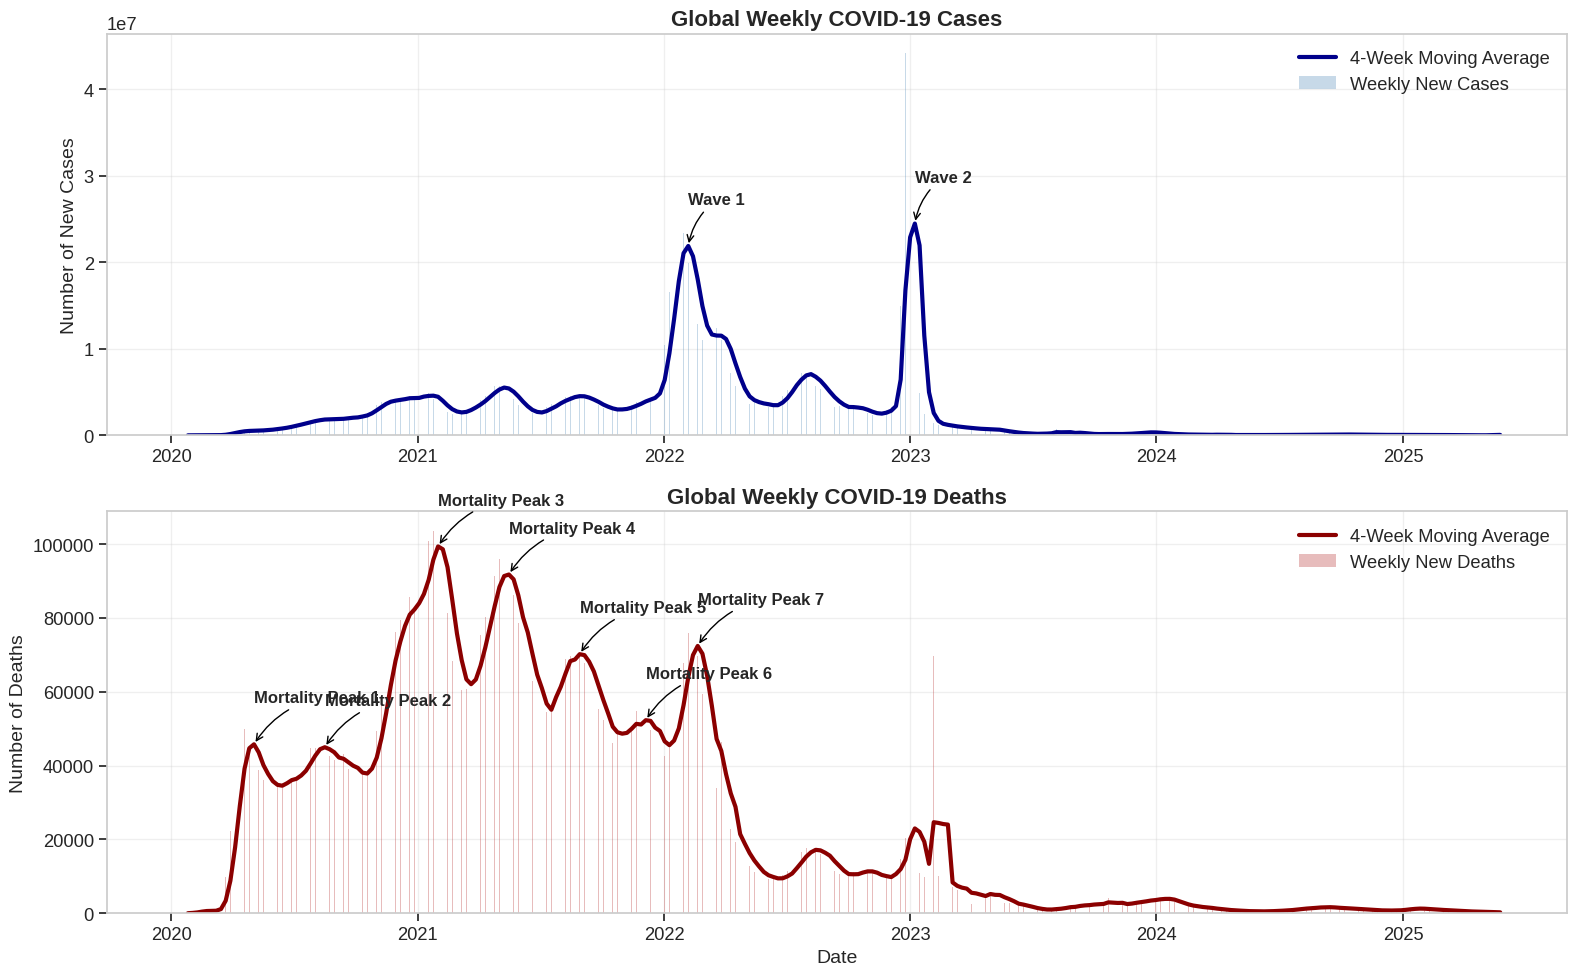

In [11]:
# ---------- GLOBAL TREND ANALYSIS ----------
print("Analyzing global COVID-19 trends...")

# Aggregate global weekly data by summing new cases/deaths and taking maximum cumulative values per week
global_weekly = covid_weekly.groupby('Date_reported').agg(
    New_cases=('New_cases', 'sum'),
    New_deaths=('New_deaths', 'sum'),
    Cumulative_cases=('Cumulative_cases', 'max'),
    Cumulative_deaths=('Cumulative_deaths', 'max')
).reset_index()

# Calculate 4-week moving averages to smooth short-term fluctuations
global_weekly['Cases_MA_4W'] = global_weekly['New_cases'].rolling(window=4).mean()
global_weekly['Deaths_MA_4W'] = global_weekly['New_deaths'].rolling(window=4).mean()

# ---------- GLOBAL TRENDS VISUALIZATION ----------
plt.figure(figsize=(16, 10))

# --- Plot 1: Weekly New Cases with Moving Average and Peaks ---
ax1 = plt.subplot(2, 1, 1)
ax1.bar(
    global_weekly['Date_reported'], global_weekly['New_cases'],
    alpha=0.3, color='steelblue', label='Weekly New Cases'
)
ax1.plot(
    global_weekly['Date_reported'], global_weekly['Cases_MA_4W'],
    color='darkblue', linewidth=3, label='4-Week Moving Average'
)

# Identify and annotate major pandemic waves (peaks in new cases)
from scipy.signal import find_peaks
peaks, _ = find_peaks(
    global_weekly['Cases_MA_4W'],
    height=global_weekly['Cases_MA_4W'].max() * 0.4,
    distance=8
)
for i, peak in enumerate(peaks):
    ax1.annotate(
        f'Wave {i+1}',
        xy=(global_weekly['Date_reported'].iloc[peak], global_weekly['Cases_MA_4W'].iloc[peak]),
        xytext=(0, 30), textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'),
        fontsize=12, fontweight='bold'
    )

ax1.set_title('Global Weekly COVID-19 Cases', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of New Cases', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Plot 2: Weekly New Deaths with Moving Average and Peaks ---
ax2 = plt.subplot(2, 1, 2)
ax2.bar(
    global_weekly['Date_reported'], global_weekly['New_deaths'],
    alpha=0.3, color='firebrick', label='Weekly New Deaths'
)
ax2.plot(
    global_weekly['Date_reported'], global_weekly['Deaths_MA_4W'],
    color='darkred', linewidth=3, label='4-Week Moving Average'
)

# Identify and annotate major mortality peaks
death_peaks, _ = find_peaks(
    global_weekly['Deaths_MA_4W'],
    height=global_weekly['Deaths_MA_4W'].max() * 0.4,
    distance=8
)
for i, peak in enumerate(death_peaks):
    ax2.annotate(
        f'Mortality Peak {i+1}',
        xy=(global_weekly['Date_reported'].iloc[peak], global_weekly['Deaths_MA_4W'].iloc[peak]),
        xytext=(0, 30), textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'),
        fontsize=12, fontweight='bold'
    )

ax2.set_title('Global Weekly COVID-19 Deaths', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Regional Comparison Analysis
> This section explores COVID-19 case dynamics by WHO region, using both heatmap and trend line visualizations.


Analyzing regional patterns...


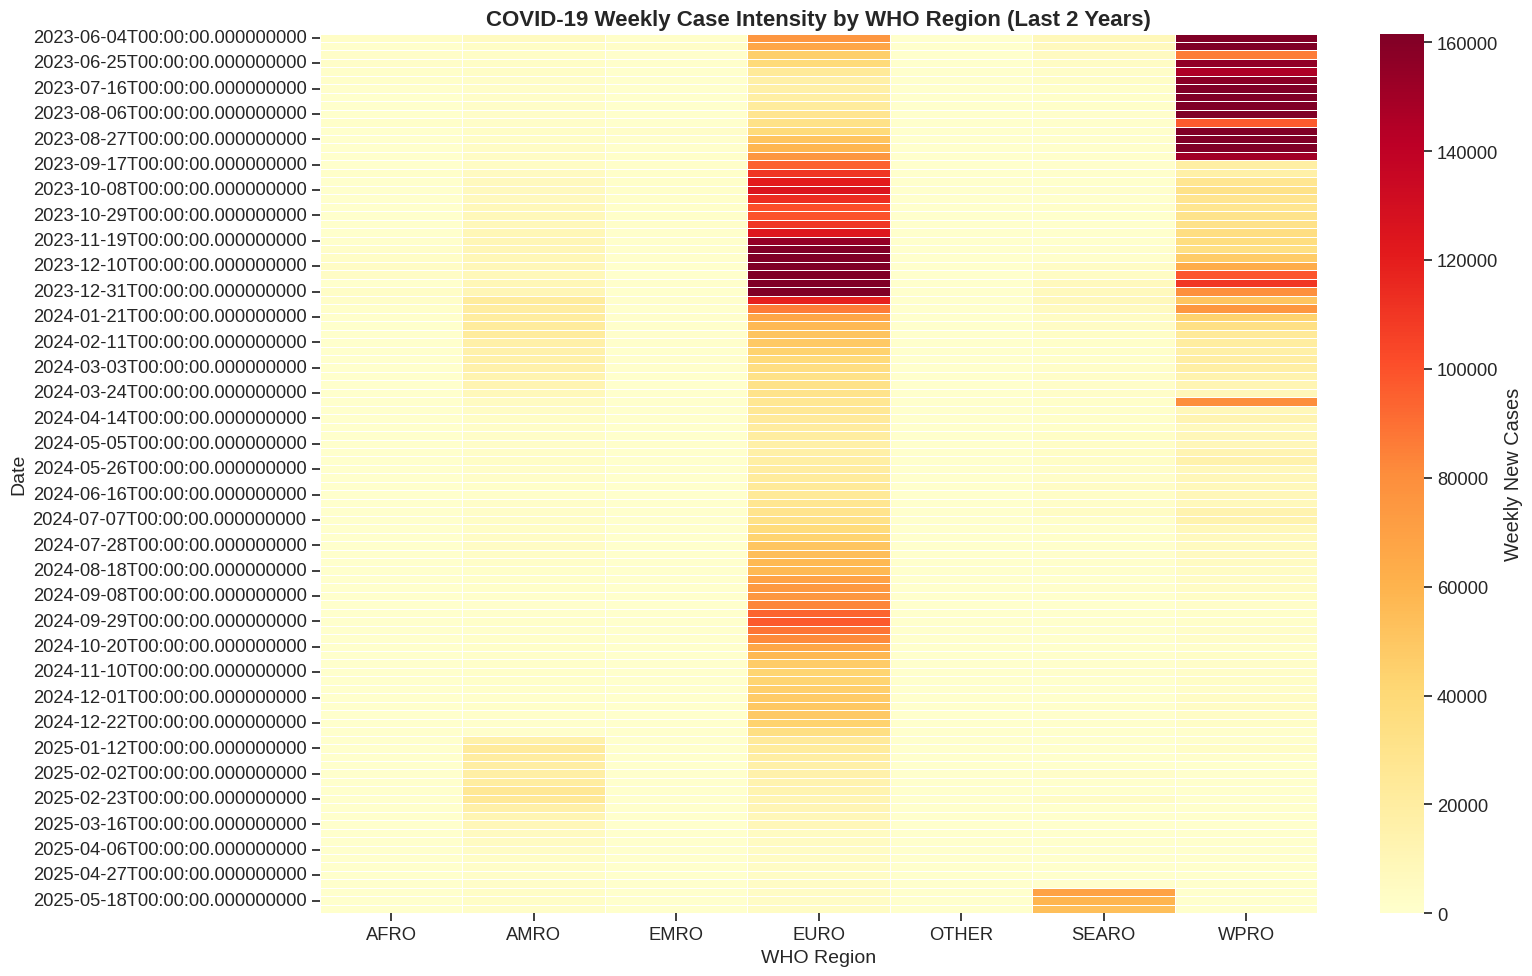

In [12]:
print("\nAnalyzing regional patterns...")

# ---------- REGIONAL DATA AGGREGATION ----------
# Group by region and date to aggregate weekly stats
regional_weekly = covid_weekly.groupby(['WHO_region', 'Date_reported']).agg(
    New_cases=('New_cases', 'sum'),
    New_deaths=('New_deaths', 'sum'),
    Cumulative_cases=('Cumulative_cases', 'max'),
    Cumulative_deaths=('Cumulative_deaths', 'max')
).reset_index()

# ---------- HEATMAP: WEEKLY NEW CASES BY REGION ----------
# Prepare a pivot table for heatmap (Date x WHO_region)
latest_cases_by_region = covid_weekly.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum().reset_index()
pivot_cases = latest_cases_by_region.pivot(index='Date_reported', columns='WHO_region', values='New_cases')

# Limit to last 2 years (104 weeks) for clarity
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    pivot_cases.iloc[-104:],  # Last 2 years
    cmap='YlOrRd', 
    linewidths=0.5,
    robust=True,
    cbar_kws={'label': 'Weekly New Cases'}
)
plt.title('COVID-19 Weekly Case Intensity by WHO Region (Last 2 Years)', fontsize=16, fontweight='bold')
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

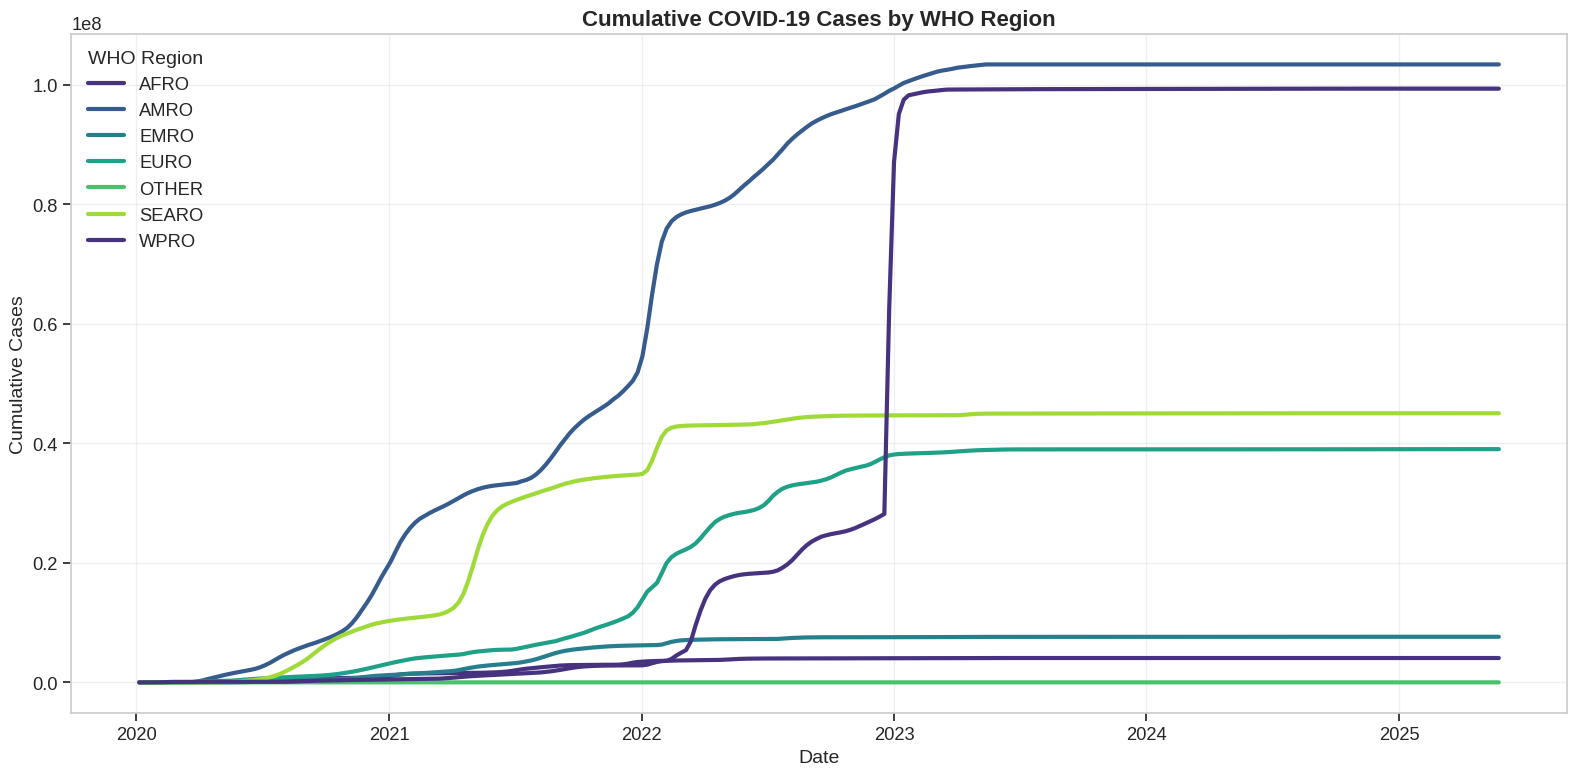

In [13]:
# ---------- LINE PLOT: CUMULATIVE CASES BY REGION ----------
plt.figure(figsize=(16, 8))
for region in regional_weekly['WHO_region'].unique():
    if pd.notnull(region):  # Skip null regions if any
        region_data = regional_weekly[regional_weekly['WHO_region'] == region]
        plt.plot(
            region_data['Date_reported'], region_data['Cumulative_cases'],
            linewidth=3, label=region
        )

plt.title('Cumulative COVID-19 Cases by WHO Region', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Cases', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='WHO Region', title_fontsize=14)
plt.tight_layout()
plt.show()


Analyzing case fatality rates...


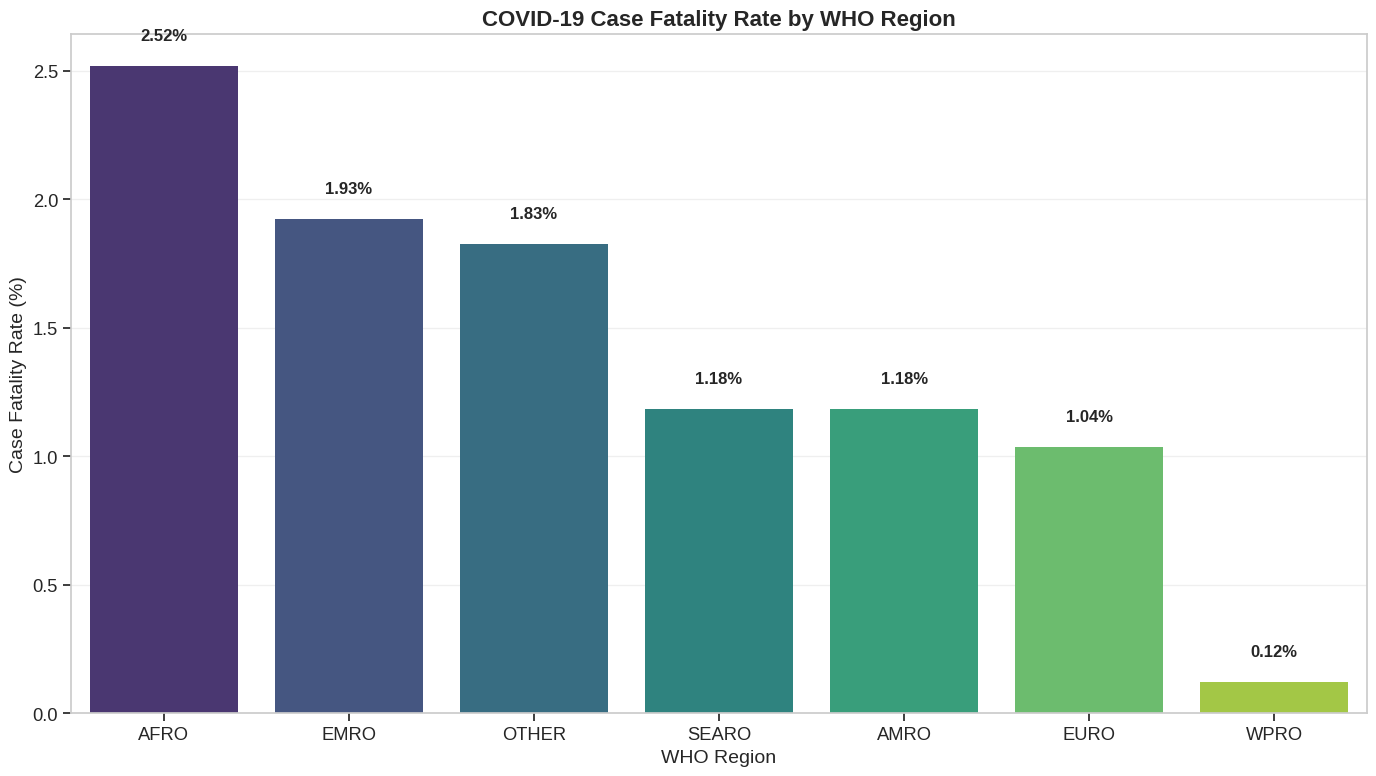

In [14]:
print("\nAnalyzing case fatality rates...")

# ---------- CFR CALCULATION ----------
# Case Fatality Rate (CFR) = (Cumulative Deaths / Cumulative Cases) * 100
regional_weekly['CFR'] = (regional_weekly['Cumulative_deaths'] / regional_weekly['Cumulative_cases']) * 100

# Extract the latest CFR value for each region (most recent date in dataset)
latest_cfr = (
    regional_weekly
    .sort_values(['WHO_region', 'Date_reported'])
    .groupby('WHO_region')
    .tail(1)[['WHO_region', 'CFR']]
    .reset_index(drop=True)
    .sort_values('CFR', ascending=False)
)

# ---------- CFR VISUALIZATION ----------
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='WHO_region', y='CFR', data=latest_cfr, palette='viridis'
)
plt.title('COVID-19 Case Fatality Rate by WHO Region', fontsize=16, fontweight='bold')
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Case Fatality Rate (%)', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# Annotate bars with CFR values
for i, v in enumerate(latest_cfr['CFR']):
    ax.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('regional_cfr.png', dpi=300, bbox_inches='tight')
plt.show()

## Most Affected Countries Analysis
> This section highlights the countries most impacted by COVID-19, visualizing the top 10 by cumulative cases and deaths.

Analyzing most affected countries...


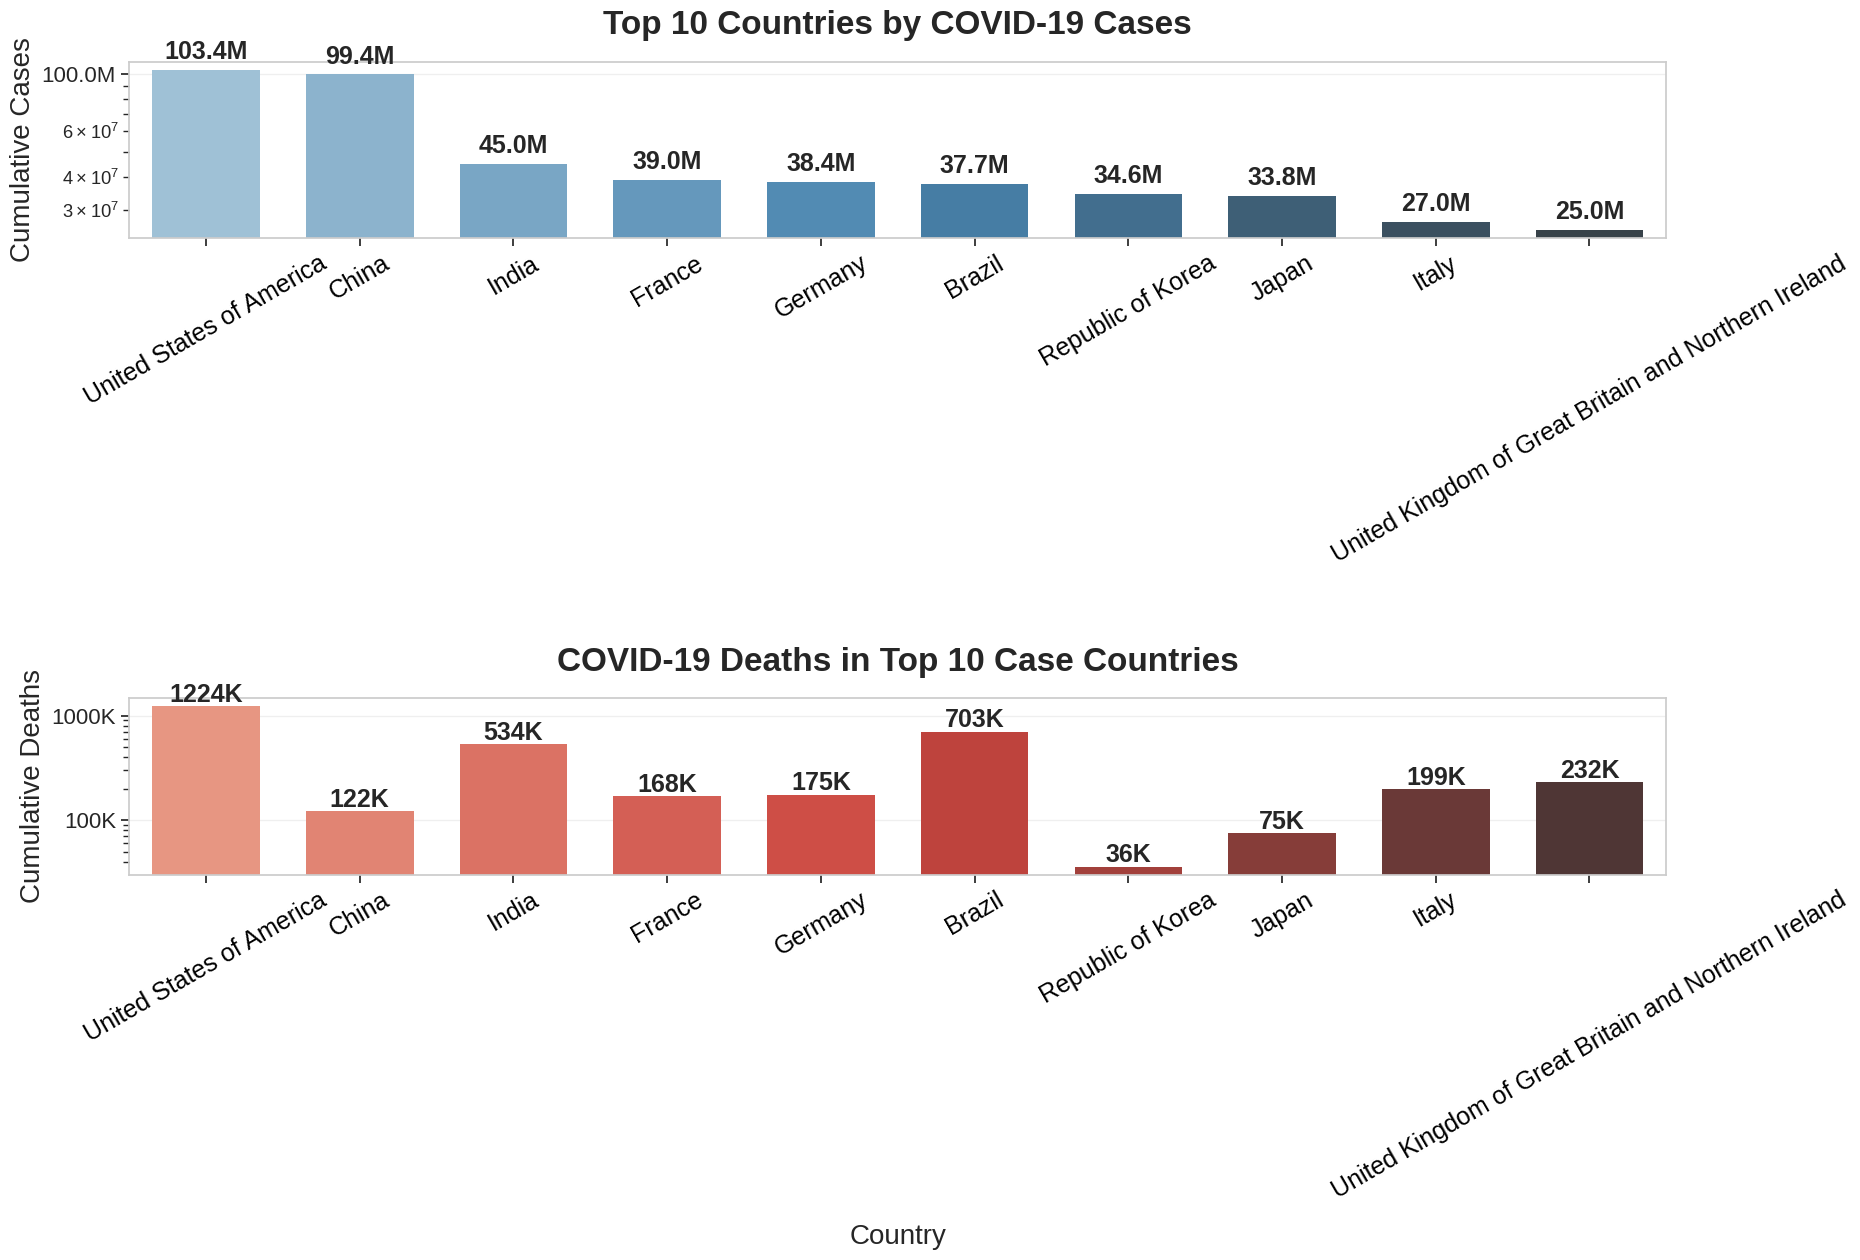

In [15]:
print("Analyzing most affected countries...")

# ---------- TOP COUNTRIES BY CASES ----------
# Aggregate to get each country's maximum cumulative cases and deaths
top_countries = (
    weekly_data.groupby('Country')
    .agg(Cumulative_cases=('Cumulative_cases', 'max'),
         Cumulative_deaths=('Cumulative_deaths', 'max'))
    .sort_values('Cumulative_cases', ascending=False)
    .head(10)
    .reset_index()
)

# ---------- VISUALIZATION ----------
plt.figure(figsize=(20, 14))

# --- Top Plot: Cumulative Cases (log scale, millions) ---
ax1 = plt.subplot(2, 1, 1)
sns.barplot(
    x='Country', y='Cumulative_cases', data=top_countries,
    palette='Blues_d', ax=ax1, width=0.7
)
ax1.set_title('Top 10 Countries by COVID-19 Cases', fontsize=24, fontweight='bold', pad=20)
ax1.set_ylabel('Cumulative Cases', fontsize=20)
ax1.set_xlabel('')
ax1.tick_params(axis='x', labelsize=18, rotation=30, labelcolor='black')
ax1.tick_params(axis='y', labelsize=16)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, axis='y')

# Format y-axis for millions
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Annotate bar tops with values
for i, v in enumerate(top_countries['Cumulative_cases']):
    ax1.text(i, v * 1.1, f'{v/1e6:.1f}M', ha='center', fontsize=18, fontweight='bold')

# --- Bottom Plot: Cumulative Deaths (log scale, thousands) ---
ax2 = plt.subplot(2, 1, 2)
sns.barplot(
    x='Country', y='Cumulative_deaths', data=top_countries,
    palette='Reds_d', ax=ax2, width=0.7
)
ax2.set_title('COVID-19 Deaths in Top 10 Case Countries', fontsize=24, fontweight='bold', pad=20)
ax2.set_xlabel('Country', fontsize=20, labelpad=15)
ax2.set_ylabel('Cumulative Deaths', fontsize=20)
ax2.tick_params(axis='x', labelsize=18, rotation=30, labelcolor='black')
ax2.tick_params(axis='y', labelsize=16)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')

# Format y-axis for thousands
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e3:.0f}K'))

# Annotate bar tops with values
for i, v in enumerate(top_countries['Cumulative_deaths']):
    ax2.text(i, v * 1.1, f'{v/1e3:.0f}K', ha='center', fontsize=18, fontweight='bold')

# Adjust spacing and layout for clarity
plt.subplots_adjust(hspace=0.3)
plt.tight_layout(pad=4.0)
plt.show()

## Interactive World Map Visualization
> This section creates an interactive choropleth map to visualize the global spread of COVID-19 using Plotly.

In [16]:
print("\nGenerating interactive world map visualization...")

# ---------- PREPARE COUNTRY-LEVEL DATA ----------
# Use the most recent data for each country
latest_data = (
    covid_weekly
    .sort_values('Date_reported')
    .groupby('Country')
    .last()
    .reset_index()
)

# ---------- CHOROPLETH MAP: CUMULATIVE CASES ----------
fig = px.choropleth(
    latest_data,
    locations='Country',  # Use full country names for mapping accuracy
    locationmode='country names',
    color=np.log10(latest_data['Cumulative_cases'] + 1),  # Log scale handles wide value range
    hover_name='Country',
    hover_data={
        'Cumulative_cases': True,
        'Cumulative_deaths': True,
        'New_cases': True,
        'New_deaths': True,
        'Country_code': False  # Hide ISO code for cleaner display
    },
    projection='natural earth',
    title='Global COVID-19 Cumulative Cases (Log Scale)',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'color': 'Log10(Cases)'}
)

# Define a fixed color scale for consistent interpretation
fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=30),
    title=dict(font=dict(size=20), x=0.5),
    coloraxis_colorbar=dict(
        title="Log10(Cases)",
        tickvals=[0, 2, 4, 6, 8],
        ticktext=["0", "100", "10K", "1M", "100M"]
    )
)

# ---------- OPTIONAL: ANNOTATE TOP 5 COUNTRIES ----------
# Note: Annotations on choropleth maps may not appear as expected due to geographic projection.
top5_countries = latest_data.nlargest(5, 'Cumulative_cases')
for _, country in top5_countries.iterrows():
    fig.add_annotation(
        x=country['Country'],
        y=0,  # Ignored for this map type; placeholder for completeness
        text=country['Country'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40
    )

fig.show()


Generating interactive world map visualization...


### COVID-19 Global Bubble Map Animation (Chronological Timeline)

In [17]:
print("Creating COVID-19 global bubble map animation with proper chronological timeline...")

import plotly.express as px
import numpy as np
from datetime import datetime

# --- Prepare data ---
covid_map = weekly_data.copy()
covid_map['Date_reported'] = pd.to_datetime(covid_map['Date_reported'])

# Filter to a reasonable date range (2020-01-01 to 2025-04-30)
covid_map = covid_map[
    (covid_map['Date_reported'] >= '2020-01-01') &
    (covid_map['Date_reported'] <= '2025-04-30')
].copy()

# Ensure country columns are strings
covid_map['Country'] = covid_map['Country'].astype(str)

# Format date for animation
covid_map['date'] = covid_map['Date_reported'].dt.strftime('%m/%d/%Y')
covid_map['confirmed'] = covid_map['Cumulative_cases']
covid_map['deaths'] = covid_map['Cumulative_deaths']
# Bubble size: power scaling for visibility
covid_map['size'] = covid_map['confirmed'].pow(0.3)

# Sort by date to ensure proper animation order
covid_map = covid_map.sort_values('Date_reported')

# --- Create animated geo scatter plot ---
fig = px.scatter_geo(
    covid_map,
    locations="Country",
    locationmode="country names",
    color=np.log10(covid_map['confirmed'] + 1),
    size="size",
    hover_name="Country",
    hover_data={
        "confirmed": True,
        "deaths": True,
        "date": True
    },
    animation_frame="date",
    projection="natural earth",
    title="COVID-19: Spread Over Time (Cumulative Cases, Log Scale)",
    color_continuous_scale="portland",
    labels={"color": "Log10(Cumulative Cases)"}
)

# --- Layout (dark theme, readable) ---
fig.update_layout(
    template="plotly_dark",
    paper_bgcolor="rgba(0, 0, 0, 0.9)",
    geo=dict(
        showland=True,
        landcolor="rgba(40, 40, 40, 1)",
        showocean=True,
        oceancolor="rgba(0, 0, 0, 1)",
        showcountries=True,
        countrycolor="rgba(80, 80, 80, 1)",
        showcoastlines=False,
        projection_type="natural earth",
        bgcolor="rgba(0, 0, 0, 1)"
    ),
    height=700,
    width=1100,
    coloraxis_colorbar=dict(
        title="Log10(Cumulative Cases)",
        tickvals=[0, 2, 4, 6, 8],
        ticktext=["0", "100", "10K", "1M", "100M"]
    )
)

# Note: Plotly handles play/pause and slider automatically.
# Ensuring chronological order: animation_frame="date" and sorted data are sufficient.

fig.show()

print("Global COVID-19 bubble map animation with chronological timeline created!")

Creating COVID-19 global bubble map animation with proper chronological timeline...


Global COVID-19 bubble map animation with chronological timeline created!


In [18]:
# This section estimates global recoveries (approximate) and calculates
# active cases using a heuristic, due to lack of official recovery data.

# Ensure datetime index
weekly_data['Date_reported'] = pd.to_datetime(weekly_data['Date_reported'])

# Aggregate globally by date
datewise = (
    weekly_data
    .groupby('Date_reported')
    .agg({
        'New_cases': 'sum',
        'New_deaths': 'sum',
        'Cumulative_cases': 'max',
        'Cumulative_deaths': 'max'
    })
    .reset_index()
    .set_index('Date_reported')
)

# Estimate recovered cases (97% recovery rate, 3-week lag)
datewise['Recovered'] = datewise['Cumulative_cases'].shift(3) * 0.97
datewise['Recovered'] = datewise['Recovered'].fillna(0)

# Recovered should not exceed (cumulative cases minus deaths)
datewise['Recovered'] = datewise[['Recovered', 'Cumulative_cases']].min(axis=1) - datewise['Cumulative_deaths']
datewise['Recovered'] = datewise['Recovered'].clip(lower=0)  # No negative recoveries

# Calculate active cases: Active = Total Cases - Recovered - Deaths
datewise['Active'] = datewise['Cumulative_cases'] - datewise['Recovered'] - datewise['Cumulative_deaths']

# Color scheme for plotting
active_color = '#1f77b4'    # blue
recovered_color = '#2ca02c' # green
deaths_color = '#d62728'    # red

# ---------------------------------------------------------------
# Comments:
# - Recovery estimate uses a 3-week lag and 97% recovery rate as an epidemiological heuristic.
# - All calculations ensure epidemiological logic (no negatives, deaths always subtracted).
# - Ready for downstream plotting (e.g., stacked area or timeline).

## Active COVID-19 Cases Visualization (Global Timeline)
> This section visualizes the estimated number of active COVID-19 cases globally over time, using a bar plot.

In [19]:
fig = px.bar(
    x=datewise.index,
    y=datewise['Active'],
    labels={'x': 'Date', 'y': 'Number of Active Cases'}
)
fig.update_layout(
    title="Distribution of Active COVID-19 Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    template="plotly_white"
)
fig.show()

### Closed COVID-19 Cases Visualization (Global Timeline)
> This section visualizes the number of closed cases (recovered + deaths) globally over time, using a bar plot.

In [20]:
fig = px.bar(
    x=datewise.index,
    y=datewise['Recovered'] + datewise['Cumulative_deaths'],
    labels={'x': 'Date', 'y': 'Number of Closed Cases'}
)
fig.update_layout(
    title="Distribution of Closed COVID-19 Cases (Recovered + Deaths)",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    template="plotly_white"
)
fig.show()

### Weekly Growth Visualization of COVID-19 Cases (Global)
> This script visualizes weekly global growth of confirmed, recovered, and death case counts using a clean, sequential week axis.

In [21]:
# Extract week of year and year
datewise['WeekOfYear'] = datewise.index.isocalendar().week
datewise['Year'] = datewise.index.year

# Create combined year-week label (e.g., "2020-15")
datewise['YearWeek'] = datewise['Year'].astype(str) + '-' + datewise['WeekOfYear'].astype(str).str.zfill(2)

# Get last entry for each week (to avoid partial weeks)
weekly_agg = datewise.groupby('YearWeek').last()

# Sequential week number for x-axis (for continuous timeline)
week_num = list(range(1, len(weekly_agg) + 1))

# Create interactive weekly growth plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Cumulative_cases'],
    mode='lines+markers',
    name='Confirmed Cases',
    line=dict(color=active_color, width=2)
))
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Recovered'],
    mode='lines+markers',
    name='Recovered Cases',
    line=dict(color=recovered_color, width=2)
))
fig.add_trace(go.Scatter(
    x=week_num,
    y=weekly_agg['Cumulative_deaths'],
    mode='lines+markers',
    name='Deaths',
    line=dict(color=deaths_color, width=2)
))

fig.update_layout(
    title="Weekly Growth of COVID-19 Cases Globally",
    xaxis_title="Week Number",
    yaxis_title="Number of Cases",
    legend=dict(x=0, y=1, traceorder="normal"),
    template="plotly_white"
)
fig.show()

### Daily/Weekly Averages and Increases Visualization
> This script calculates and visualizes the average weekly increases in confirmed, death, and estimated recovered COVID-19 cases globally.

In [22]:
# ---------- DAILY/WEEKLY AVERAGE INCREASES ----------
print("Average increase in number of Confirmed Cases every week: ", 
      np.round(datewise["New_cases"].mean()))
print("Average increase in number of Deaths every week: ", 
      np.round(datewise["New_deaths"].mean()))
print("Average estimated increase in Recovered cases every week: ", 
      np.round(datewise["Recovered"].diff().fillna(0).mean()))

# ---------- WEEKLY INCREASES VISUALIZATION ----------
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["New_cases"],
    mode='lines+markers',
    name='New Confirmed Cases',
    line=dict(color=active_color, width=1.5)
))
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["Recovered"].diff().fillna(0),
    mode='lines+markers',
    name='New Recovered Cases',
    line=dict(color=recovered_color, width=1.5)
))
fig.add_trace(go.Scatter(
    x=datewise.index, 
    y=datewise["New_deaths"],
    mode='lines+markers',
    name='New Death Cases',
    line=dict(color=deaths_color, width=1.5)
))
fig.update_layout(
    title="Weekly Increase in Different Types of COVID-19 Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend=dict(x=0, y=1, traceorder="normal"),
    template="plotly_white"
)
fig.show()

Average increase in number of Confirmed Cases every week:  2758689.0
Average increase in number of Deaths every week:  25165.0
Average estimated increase in Recovered cases every week:  351452.0


### Cases Over Time Area Chart (Stacked Area Visualization)
> This section creates a stacked area chart of Recovered, Deaths, and Active cases globally over time, with optional helper functions.

In [23]:
# Prepare data for area chart: melt wide to long format
temp = datewise[['Recovered', 'Cumulative_deaths', 'Active']].copy()
temp = temp.reset_index()
temp_melted = temp.melt(
    id_vars="Date_reported",
    value_vars=['Recovered', 'Cumulative_deaths', 'Active'],
    var_name='Case',
    value_name='Count'
)

# Area chart: Stacked by case type (Recovered, Deaths, Active)
fig = px.area(
    temp_melted, 
    x="Date_reported", 
    y="Count", 
    color="Case", 
    height=600, 
    width=900,
    title='Cases over time',
    color_discrete_map={
        'Recovered': recovered_color,
        'Cumulative_deaths': deaths_color,
        'Active': active_color
    }
)

fig.update_layout(
    xaxis_rangeslider_visible=True,
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend_title="Case Type",
    template="plotly_white"
)

# Add a watermark (user info and timestamp)
fig.add_annotation(
    xref="paper",
    yref="paper",
    x=0.98,
    y=0.02,
    text=f"Analysis by: AdilShamim8 | {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} UTC",
    showarrow=False,
    font=dict(size=10, color="gray"),
    align="right",
    opacity=0.7
)

fig.show()

# ---------- OPTIONAL: Helper Plotting Functions ----------
def plot_daywise(col, hue):
    fig = px.bar(datewise, x=datewise.index, y=col, width=900, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="Date", yaxis_title="Count")
    fig.show()
    
def plot_daywise_line(col, hue):
    fig = px.line(datewise, x=datewise.index, y=col, width=900, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="Date", yaxis_title="Count")
    fig.show()

# Prepare Latest Country-Level Data and Weekly Changes
> This section extracts the most recent week's data by country, computes weekly changes for confirmed, recovered, and deaths,
and prepares summary tables for analysis and visualization.

In [24]:
print("Preparing latest country-level data...")

# Get the most recent reporting date in the dataset
latest_date = weekly_data['Date_reported'].max()
print(f"Latest data date: {latest_date}")

# --- Previous Week Data ---
# For each country, find the latest date before the current latest_date
previous_week = weekly_data[weekly_data['Date_reported'] < latest_date].groupby('Country')['Date_reported'].max()
previous_week_data = weekly_data[weekly_data['Date_reported'].isin(previous_week)]

# --- Latest Data for Each Country ---
latest_country_data = weekly_data[weekly_data['Date_reported'] == latest_date].copy()

# --- Merge for Previous Week and Calculate Changes ---
country_changes = pd.merge(
    latest_country_data,
    previous_week_data[['Country', 'Cumulative_cases', 'Cumulative_deaths']],
    on='Country',
    suffixes=('', '_prev')
)
country_changes['Last Week Confirmed'] = country_changes['Cumulative_cases'] - country_changes['Cumulative_cases_prev']
country_changes['Last Week Deaths'] = country_changes['Cumulative_deaths'] - country_changes['Cumulative_deaths_prev']

# --- Estimate Recoveries (97% recovery, 3-week lag proxy) ---
three_weeks_ago = weekly_data[weekly_data['Date_reported'] < latest_date - pd.Timedelta(days=21)].groupby('Country')['Date_reported'].max()
three_weeks_data = weekly_data[weekly_data['Date_reported'].isin(three_weeks_ago)]

country_changes = pd.merge(
    country_changes,
    three_weeks_data[['Country', 'Cumulative_cases', 'Cumulative_deaths']],
    on='Country',
    suffixes=('', '_3w')
)
country_changes['Last Week Recovered'] = np.maximum(
    ((country_changes['Cumulative_cases_3w'] - country_changes['Cumulative_deaths_3w']) * 0.97) -
    ((country_changes['Cumulative_cases_prev'] - country_changes['Cumulative_deaths_prev']) * 0.97),
    0
)

# --- Clean up and rename columns for presentation ---
final_data = country_changes.rename(columns={
    'Country': 'Country Name',
    'WHO_region': 'WHO Region'
})

# --- Global Weekly Totals (for proportion calculation) ---
global_confirmed = final_data['Last Week Confirmed'].sum()
global_recovered = final_data['Last Week Recovered'].sum()
global_deaths = final_data['Last Week Deaths'].sum()

# --- Proportion columns (as percentage of global weekly total) ---
final_data['Proportion of Confirmed'] = final_data['Last Week Confirmed'] / global_confirmed * 100
final_data['Proportion of Recovered'] = final_data['Last Week Recovered'] / global_recovered * 100
final_data['Proportion of Deaths'] = final_data['Last Week Deaths'] / global_deaths * 100

# --- Top 15 countries by each metric ---
Top_15_Confirmed = final_data.sort_values(['Last Week Confirmed'], ascending=False).head(15)
Top_15_Recovered = final_data.sort_values(['Last Week Recovered'], ascending=False).head(15)
Top_15_Deaths = final_data.sort_values(['Last Week Deaths'], ascending=False).head(15)

Preparing latest country-level data...
Latest data date: 2025-05-25 00:00:00


### Top 15 Countries Weekly Metrics Visualization (Barplots)
> Visualizes top 15 countries by last week's confirmed, recovered, and death cases, colored by WHO region, as three stacked barplots.

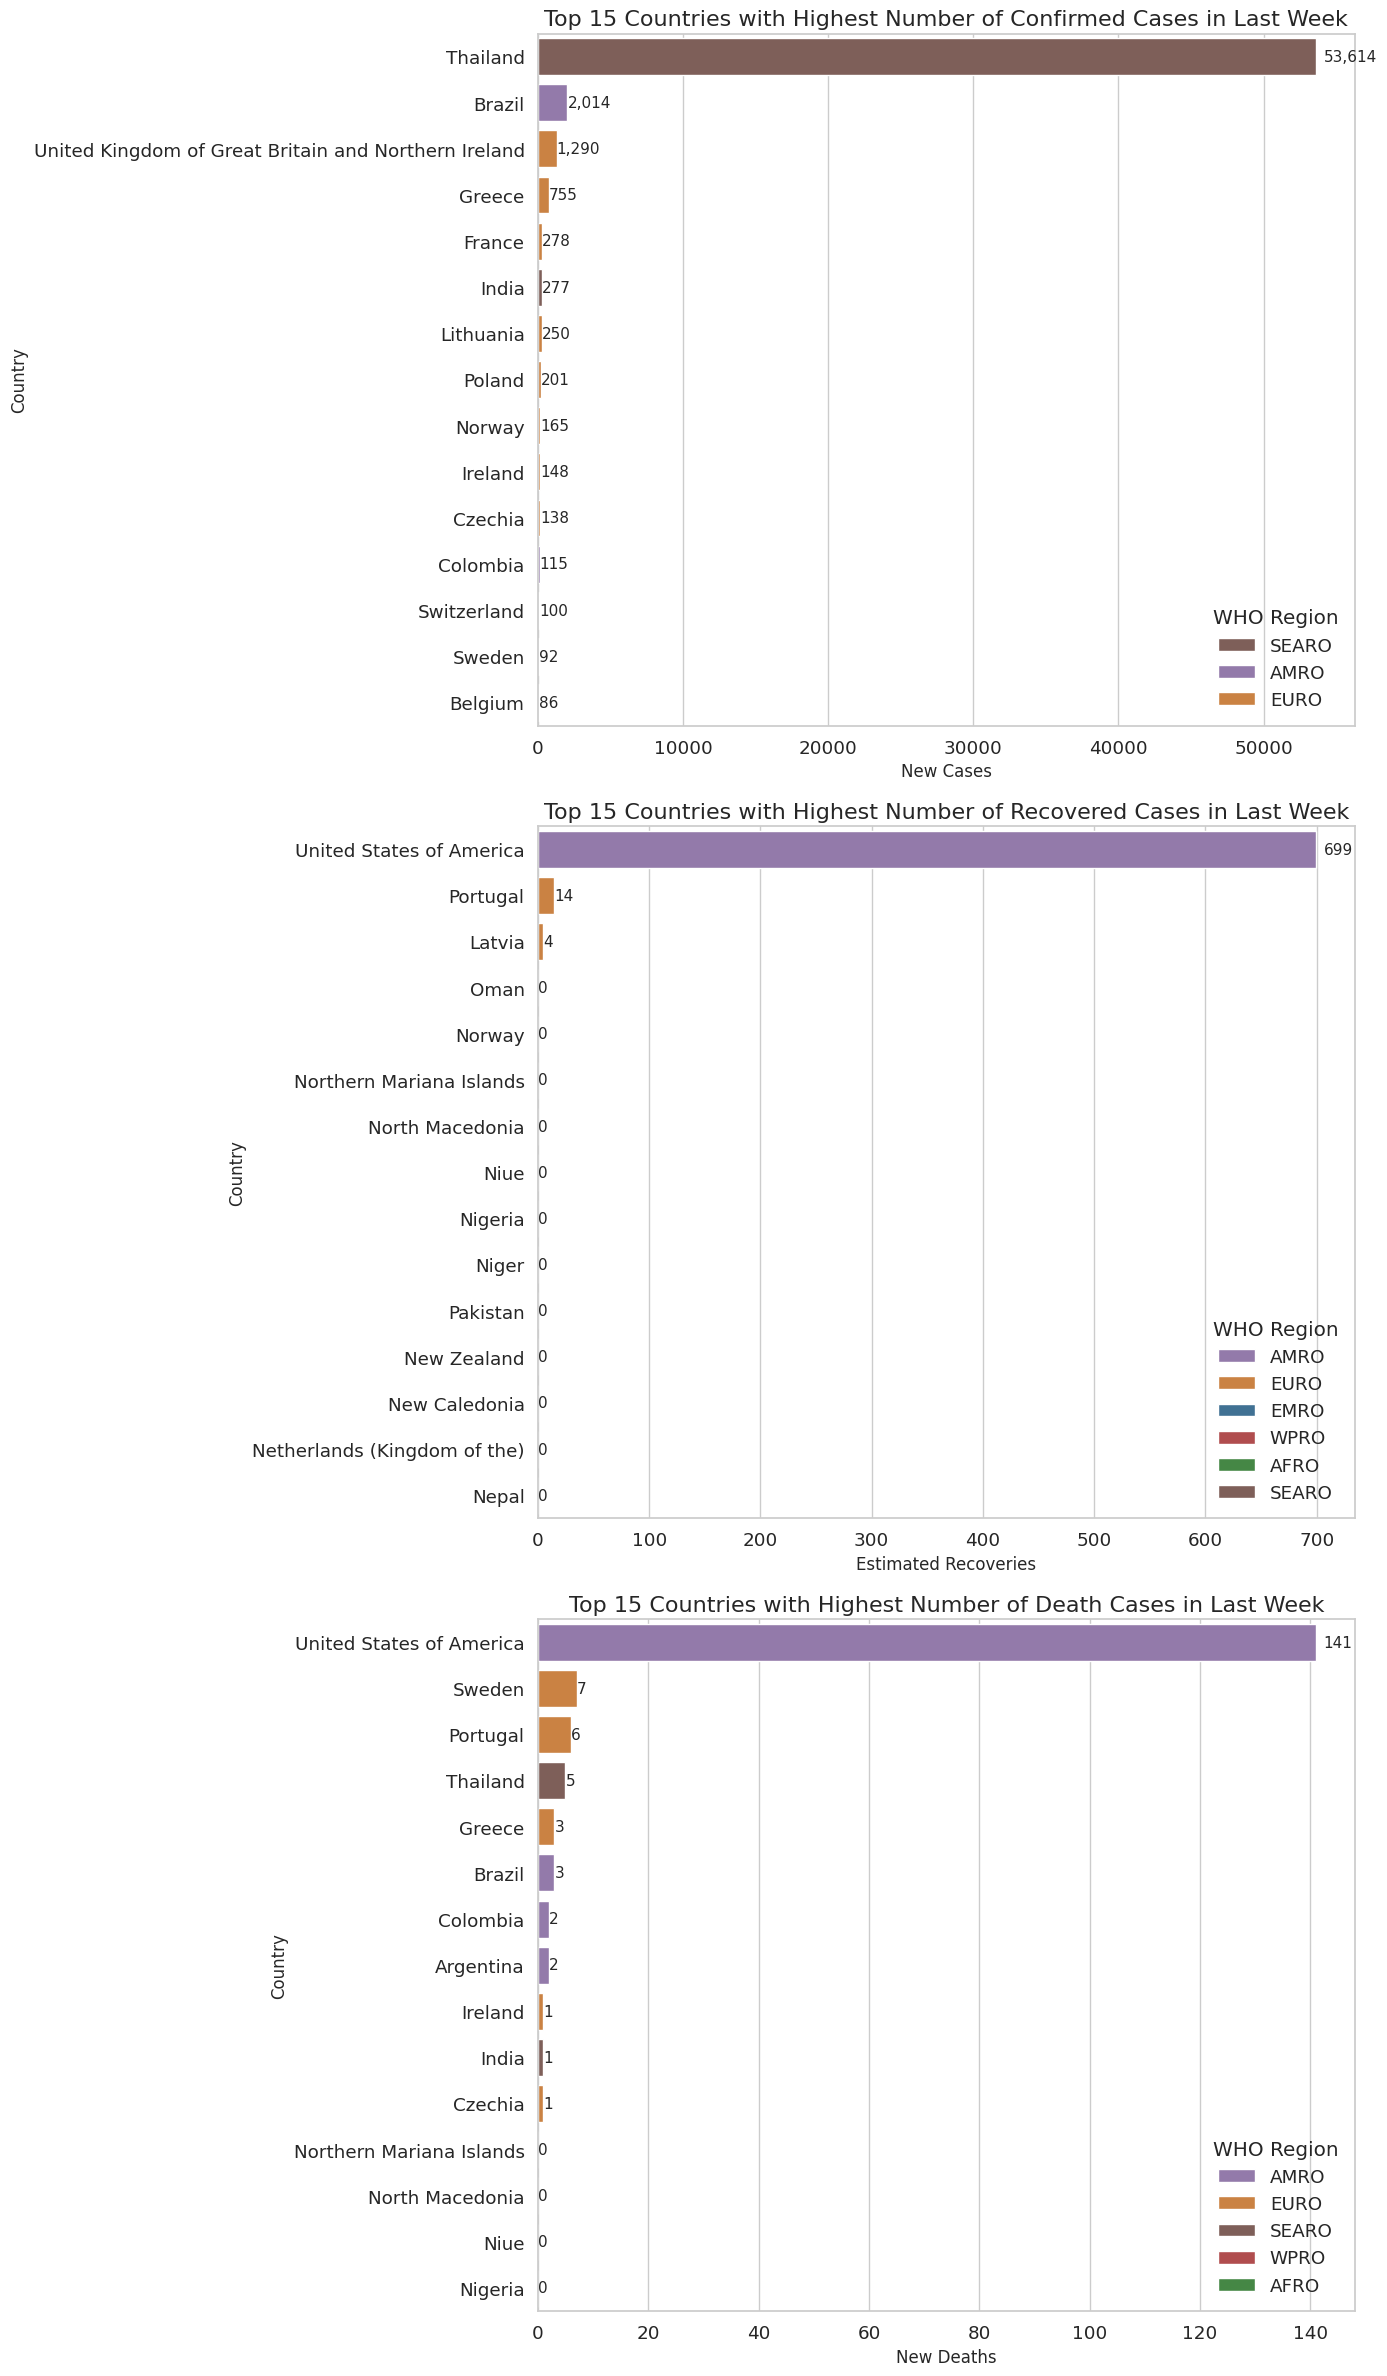

In [25]:
# Ensure the font is readable and seaborn style is set
sns.set(style="whitegrid", font_scale=1.2)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 24))

# WHO region color palette
region_palette = {
    'EMRO': '#3274A1',
    'EURO': '#E1812C',
    'AFRO': '#3A923A',
    'WPRO': '#C03D3E',
    'AMRO': '#9372B2',
    'SEARO': '#845B53',
    'OTHER': '#D3D3D3'
}

# ---------- Confirmed Cases Barplot ----------
sns.barplot(
    x='Last Week Confirmed', 
    y='Country Name', 
    data=Top_15_Confirmed,
    hue='WHO Region',
    palette=region_palette,
    dodge=False,
    ax=ax1
)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last Week", fontsize=16)
ax1.set_xlabel("New Cases", fontsize=12)
ax1.set_ylabel("Country", fontsize=12)
ax1.legend(title='WHO Region', loc='lower right')

# Add value labels
for i, v in enumerate(Top_15_Confirmed['Last Week Confirmed']):
    ax1.text(v + v*0.01, i, f"{int(v):,}", va='center', fontsize=11)

# ---------- Recovered Cases Barplot ----------
sns.barplot(
    x='Last Week Recovered', 
    y='Country Name', 
    data=Top_15_Recovered,
    hue='WHO Region',
    palette=region_palette,
    dodge=False,
    ax=ax2
)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last Week", fontsize=16)
ax2.set_xlabel("Estimated Recoveries", fontsize=12)
ax2.set_ylabel("Country", fontsize=12)
ax2.legend(title='WHO Region', loc='lower right')

for i, v in enumerate(Top_15_Recovered['Last Week Recovered']):
    ax2.text(v + v*0.01, i, f"{int(v):,}", va='center', fontsize=11)

# ---------- Deaths Barplot ----------
sns.barplot(
    x='Last Week Deaths', 
    y='Country Name', 
    data=Top_15_Deaths,
    hue='WHO Region',
    palette=region_palette,
    dodge=False,
    ax=ax3
)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last Week", fontsize=16)
ax3.set_xlabel("New Deaths", fontsize=12)
ax3.set_ylabel("Country", fontsize=12)
ax3.legend(title='WHO Region', loc='lower right')

for i, v in enumerate(Top_15_Deaths['Last Week Deaths']):
    ax3.text(v + v*0.01, i, f"{int(v):,}", va='center', fontsize=11)

plt.tight_layout()
plt.savefig("top_15_countries_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

## Comprehensive Country-Level COVID-19 Analysis Dataset
> This block prepares an enriched dataset for country-level analysis, including CFR and per-capita metrics.

In [26]:
print("Generating comprehensive country-level analysis...")

# ---------- PREPARE COUNTRY ANALYSIS DATASET ----------
# Get the most recent data point for each country
latest_date = weekly_data['Date_reported'].max()
latest_data = weekly_data[weekly_data['Date_reported'] == latest_date].copy()

# Sort by cumulative cases to get overall rankings
top_countries_cases = latest_data.sort_values('Cumulative_cases', ascending=False).head(20)

# Calculate case fatality rate (CFR, %)
latest_data['CFR'] = (latest_data['Cumulative_deaths'] / latest_data['Cumulative_cases']) * 100

# Approximate population data for major countries (for demo/stub use)
population_data = {
    'United States of America': 331000000,
    'India': 1380000000,
    'Brazil': 212000000,
    'France': 65000000,
    'Germany': 83000000,
    'United Kingdom': 67000000,
    'Italy': 60000000,
    'Japan': 126000000,
    'Korea, Republic of': 51000000,
    'Spain': 47000000,
    'Viet Nam': 97000000,
    'Australia': 25000000,
    'Argentina': 45000000,
    'Netherlands': 17000000,
    'Iran (Islamic Republic of)': 83000000,
    'Colombia': 50000000,
    'Indonesia': 273000000,
    'Poland': 38000000,
    'Mexico': 128000000,
    'Thailand': 69000000,
    'Austria': 9000000,
    'Ukraine': 44000000,
    'Russian Federation': 144000000,
    'China': 1402000000
}

# Merge population into country data
pop_df = pd.DataFrame(list(population_data.items()), columns=['Country', 'Population'])
latest_data = pd.merge(latest_data, pop_df, on='Country', how='left')

# For countries without population data, fill with region median or 50M fallback
region_pop_median = latest_data.groupby('WHO_region')['Population'].median()
for region in latest_data['WHO_region'].unique():
    mask = (latest_data['WHO_region'] == region) & (latest_data['Population'].isna())
    latest_data.loc[mask, 'Population'] = region_pop_median.get(region, 50000000)

# Calculate per capita metrics (per 100,000 population)
latest_data['Cases_per_100k'] = (latest_data['Cumulative_cases'] / latest_data['Population']) * 100000
latest_data['Deaths_per_100k'] = (latest_data['Cumulative_deaths'] / latest_data['Population']) * 100000

Generating comprehensive country-level analysis...


### 1. OVERALL TOP COUNTRIES VISUALIZATION (Plotly Subplots)
> Visualizes top 15 countries for total cases, per-capita cases, and case fatality rate (CFR), each as a horizontal bar chart.

In [27]:
print("\n1. Creating overall top countries visualization...")

# Create a figure with 3 subplots (horizontal bar charts)
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        "Top 15 Countries by Total Cumulative COVID-19 Cases",
        "Top 15 Countries by COVID-19 Cases per 100,000 Population",
        "Top 15 Countries by Case Fatality Rate (%)"
    ),
    vertical_spacing=0.1,
    specs=[[{"type": "bar"}], [{"type": "bar"}], [{"type": "bar"}]]
)

# Color mapping for WHO regions
region_colors = {
    'EMRO': '#3274A1',
    'EURO': '#E1812C',
    'AFRO': '#3A923A',
    'WPRO': '#C03D3E',
    'AMRO': '#9372B2',
    'SEARO': '#845B53'
}

# 1. Top by absolute numbers
top_abs = latest_data.nlargest(15, 'Cumulative_cases')
fig.add_trace(
    go.Bar(
        x=top_abs['Cumulative_cases'],
        y=top_abs['Country'],
        orientation='h',
        text=top_abs['Cumulative_cases'].apply(lambda x: f"{x:,.0f}"),
        textposition='outside',
        marker_color=top_abs['WHO_region'].map(region_colors),
        name='Total Cases',
        hovertemplate="<b>%{y}</b><br>Total Cases: %{x:,.0f}<extra></extra>",
    ),
    row=1, col=1
)

# 2. Top by per capita
top_capita = latest_data.nlargest(15, 'Cases_per_100k')
fig.add_trace(
    go.Bar(
        x=top_capita['Cases_per_100k'],
        y=top_capita['Country'],
        orientation='h',
        text=top_capita['Cases_per_100k'].apply(lambda x: f"{x:,.1f}"),
        textposition='outside',
        marker_color=top_capita['WHO_region'].map(region_colors),
        name='Cases per 100k',
        hovertemplate="<b>%{y}</b><br>Cases per 100k: %{x:,.1f}<extra></extra>",
    ),
    row=2, col=1
)

# 3. Top by CFR (countries with at least 10,000 cases)
cfr_data = latest_data[latest_data['Cumulative_cases'] >= 10000]
top_cfr = cfr_data.nlargest(15, 'CFR')
fig.add_trace(
    go.Bar(
        x=top_cfr['CFR'],
        y=top_cfr['Country'],
        orientation='h',
        text=top_cfr['CFR'].apply(lambda x: f"{x:.2f}%"),
        textposition='outside',
        marker_color=top_cfr['WHO_region'].map(region_colors),
        name='Case Fatality Rate',
        hovertemplate="<b>%{y}</b><br>CFR: %{x:.2f}%<extra></extra>",
    ),
    row=3, col=1
)

# Update layout and axes
fig.update_layout(
    height=1200,
    width=900,
    title_text="COVID-19 Global Impact: Country Analysis",
    showlegend=False,
    template='plotly_white',
)
fig.update_xaxes(title_text="Total Cases", row=1, col=1)
fig.update_xaxes(title_text="Cases per 100,000 Population", row=2, col=1)
fig.update_xaxes(title_text="Case Fatality Rate (%)", row=3, col=1)
fig.update_yaxes(title_text="Country", row=1, col=1)
fig.update_yaxes(title_text="Country", row=2, col=1)
fig.update_yaxes(title_text="Country", row=3, col=1)

fig.show()


1. Creating overall top countries visualization...


### 2. TOP 10 COUNTRIES TRAJECTORY ANALYSIS (Cumulative Cases)
> Visualizes cumulative case trajectories for the top 10 countries both with linear and log y-axes for growth rate comparison.

In [28]:
print("\n2. Creating trajectory analysis for top 10 countries...")

# Get top 10 countries by cumulative cases
top10_countries = top_countries_cases['Country'].head(10).tolist()

# Extract all weeks' data for these countries
top10_data = weekly_data[weekly_data['Country'].isin(top10_countries)].copy()

# -- Plot: Cumulative Cases (Linear Scale) --
fig = px.line(
    top10_data, 
    x="Date_reported", 
    y="Cumulative_cases", 
    color="Country",
    title="COVID-19 Cumulative Case Trajectory: Top 10 Countries",
    labels={"Cumulative_cases": "Total Cases", "Date_reported": "Date"},
    height=600,
    width=900,
    template="plotly_white"
)
fig.update_layout(
    legend_title_text="Country",
    xaxis_title="Date",
    yaxis_title="Cumulative Cases",
    hovermode="x unified"
)
fig.show()

# -- Plot: Cumulative Cases (Logarithmic Scale) --
fig = px.line(
    top10_data, 
    x="Date_reported", 
    y="Cumulative_cases", 
    color="Country",
    title="COVID-19 Cumulative Case Trajectory: Top 10 Countries (Log Scale)",
    labels={"Cumulative_cases": "Total Cases (Log Scale)", "Date_reported": "Date"},
    height=600,
    width=900,
    template="plotly_white",
    log_y=True  # Logarithmic y-axis
)
fig.update_layout(
    legend_title_text="Country",
    xaxis_title="Date",
    yaxis_title="Cumulative Cases (Log Scale)",
    hovermode="x unified"
)
fig.show()


2. Creating trajectory analysis for top 10 countries...


### 3. REGIONAL DISTRIBUTION ANALYSIS
> Aggregates and visualizes COVID-19 case, death, and CFR metrics by WHO region using pie and bar charts.

In [29]:
print("\n3. Creating regional distribution analysis...")

# Group by WHO region and calculate metrics
region_data = latest_data.groupby('WHO_region').agg({
    'Cumulative_cases': 'sum',
    'Cumulative_deaths': 'sum',
    'Country': 'count',
    'Population': 'sum'
}).reset_index()
region_data.rename(columns={'Country': 'Number_of_Countries'}, inplace=True)

region_data['CFR'] = (region_data['Cumulative_deaths'] / region_data['Cumulative_cases']) * 100
region_data['Cases_per_100k'] = (region_data['Cumulative_cases'] / region_data['Population']) * 100000
region_data['Deaths_per_100k'] = (region_data['Cumulative_deaths'] / region_data['Population']) * 100000

# WHO region color palette
region_colors = ['#3274A1', '#E1812C', '#3A923A', '#C03D3E', '#9372B2', '#845B53']

# Create subplots: 2 pies (cases, deaths), 1 bar (CFR)
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Cases by WHO Region", "Deaths by WHO Region", "Case Fatality Rate by Region"),
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "bar"}]],
)

# Cases pie chart
fig.add_trace(
    go.Pie(
        labels=region_data['WHO_region'],
        values=region_data['Cumulative_cases'],
        name="Cases",
        textinfo='label+percent',
        marker_colors=region_colors,
        hovertemplate="<b>%{label}</b><br>Cases: %{value:,.0f}<br>Percentage: %{percent}<extra></extra>"
    ),
    row=1, col=1
)

# Deaths pie chart
fig.add_trace(
    go.Pie(
        labels=region_data['WHO_region'],
        values=region_data['Cumulative_deaths'],
        name="Deaths",
        textinfo='label+percent',
        marker_colors=region_colors,
        hovertemplate="<b>%{label}</b><br>Deaths: %{value:,.0f}<br>Percentage: %{percent}<extra></extra>"
    ),
    row=1, col=2
)

# CFR bar chart
fig.add_trace(
    go.Bar(
        x=region_data['WHO_region'],
        y=region_data['CFR'],
        text=region_data['CFR'].apply(lambda x: f"{x:.2f}%"),
        textposition='auto',
        marker_color=region_colors,
        hovertemplate="<b>%{x}</b><br>CFR: %{y:.2f}%<extra></extra>"
    ),
    row=1, col=3
)

fig.update_layout(
    title_text="COVID-19 Regional Distribution Analysis",
    height=500,
    width=1200,
    template="plotly_white"
)
fig.update_xaxes(title_text="WHO Region", row=1, col=3)
fig.update_yaxes(title_text="Case Fatality Rate (%)", row=1, col=3)

fig.show()


3. Creating regional distribution analysis...


### 4. COUNTRY CLASSIFICATION ANALYSIS: CFR vs. Case Rate
> Creates a scatter plot of CFR vs. cases per 100k for each country, highlighting top 20 countries by total cases with labels.

In [30]:
print("\n4. Creating country classification analysis...")

# Scatter plot: CFR vs Cases per 100k (log x-axis), colored by WHO region
fig = px.scatter(
    latest_data,
    x="Cases_per_100k",
    y="CFR",
    color="WHO_region",
    size="Cumulative_cases",
    hover_name="Country",
    log_x=True,
    title="COVID-19 Country Classification: CFR vs. Case Rate",
    labels={
        "Cases_per_100k": "Cases per 100,000 Population (Log Scale)",
        "CFR": "Case Fatality Rate (%)"
    },
    height=700,
    width=1000,
    template="plotly_white"
)

# Add labels for top 20 countries by cumulative cases
for i, row in top_countries_cases.head(20).iterrows():
    fig.add_annotation(
        x=latest_data.loc[latest_data['Country'] == row['Country'], 'Cases_per_100k'].values[0],
        y=latest_data.loc[latest_data['Country'] == row['Country'], 'CFR'].values[0],
        text=row['Country'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        font=dict(size=10)
    )

fig.update_layout(
    legend_title_text="WHO Region",
    xaxis_title="Cases per 100,000 Population (Log Scale)",
    yaxis_title="Case Fatality Rate (%)",
)

fig.show()


4. Creating country classification analysis...


### 5. CASE GROWTH COMPARISON: Weekly Growth Rate Visualization
> Calculates and visualizes weekly case growth rates for the top 10 countries (by cumulative cases), focusing on the last 6 months.

In [31]:
print("\n5. Creating case growth comparison visualization...")

# Calculate weekly growth rates for top 10 countries
growth_data = weekly_data[weekly_data['Country'].isin(top10_countries)].copy()
growth_data = growth_data.sort_values(['Country', 'Date_reported'])

# Calculate week-over-week growth rate (%) for each country
growth_data_grouped = growth_data.groupby('Country')
result_dfs = []
for country, df in growth_data_grouped:
    df = df.copy()
    df['Weekly_Growth_Rate'] = df['New_cases'].pct_change(1) * 100
    result_dfs.append(df)
growth_data = pd.concat(result_dfs)

# Filter to recent dates (last 6 months)
six_months_ago = latest_date - pd.Timedelta(days=180)
recent_growth = growth_data[growth_data['Date_reported'] > six_months_ago]

# Plot weekly case growth rates
fig = px.line(
    recent_growth,
    x="Date_reported",
    y="Weekly_Growth_Rate",
    color="Country",
    title="COVID-19 Weekly Case Growth Rate: Top 10 Countries (Last 6 Months)",
    labels={"Weekly_Growth_Rate": "Weekly Growth Rate (%)", "Date_reported": "Date"},
    height=600,
    width=900,
    template="plotly_white"
)
fig.update_layout(
    legend_title_text="Country",
    xaxis_title="Date",
    yaxis_title="Weekly Case Growth Rate (%)",
    hovermode="x unified"
)
fig.update_yaxes(range=[-100, 200])  # Limit y-axis range for readability

fig.show()


5. Creating case growth comparison visualization...


### 6. DEATH TO CASE RATIO OVER TIME (4-Week Rolling Window)
> Calculates and visualizes the ratio of new deaths to new cases (smoothed by a 4-week rolling window) for the top 10 countries.

In [32]:
print("\n6. Creating death-to-case ratio visualization...")

# Prepare the data for the top 10 countries
ratio_data = weekly_data[weekly_data['Country'].isin(top10_countries)].copy()
ratio_data = ratio_data.sort_values(['Country', 'Date_reported'])

# Group by country and calculate rolling sums and ratio
ratio_data_grouped = ratio_data.groupby('Country')
result_dfs = []
for country, df in ratio_data_grouped:
    df = df.copy()
    df['Rolling_Deaths'] = df['New_deaths'].rolling(4).sum()
    df['Rolling_Cases'] = df['New_cases'].rolling(4).sum()
    df['Death_to_Case_Ratio'] = (df['Rolling_Deaths'] / df['Rolling_Cases']) * 100
    result_dfs.append(df)
ratio_data = pd.concat(result_dfs)

# Filter to dates after the first 4 weeks (rolling window)
start_date = weekly_data['Date_reported'].min() + pd.Timedelta(days=28)
ratio_data = ratio_data[ratio_data['Date_reported'] >= start_date]

# Plot death-to-case ratio over time
fig = px.line(
    ratio_data,
    x="Date_reported",
    y="Death_to_Case_Ratio",
    color="Country",
    title="COVID-19 Death-to-Case Ratio Over Time: Top 10 Countries (4-Week Rolling Window)",
    labels={"Death_to_Case_Ratio": "Death-to-Case Ratio (%)", "Date_reported": "Date"},
    height=600,
    width=900,
    template="plotly_white"
)
fig.update_layout(
    legend_title_text="Country",
    xaxis_title="Date",
    yaxis_title="Death-to-Case Ratio (%)",
    hovermode="x unified"
)
fig.show()


6. Creating death-to-case ratio visualization...


In [34]:
print("Preparing data for treemap visualizations (fixed version)...")

# Get the latest data for each country
latest_date = weekly_data['Date_reported'].max()
country_wise = weekly_data[weekly_data['Date_reported'] == latest_date].copy()

# Rename columns to match the example in Image 9
country_wise = country_wise.rename(columns={
    'Country': 'Country/Region',
    'Cumulative_cases': 'Confirmed',
    'Cumulative_deaths': 'Deaths'
})


# Fill missing WHO_region values with "OTHER" - this fixes the error
country_wise['WHO_region'] = country_wise['WHO_region'].fillna('OTHER')

# Print any countries that were fixed
missing_who = weekly_data[weekly_data['WHO_region'].isna()]['Country'].unique()
if len(missing_who) > 0:
    print(f"Fixed missing WHO regions for: {', '.join(missing_who)}")

# ---------- BASIC TREEMAP FUNCTION (AS SHOWN IN IMAGE 9) ----------
def plot_treemap(col):
    """
    Create a treemap visualization of COVID-19 data by country.
    
    Parameters:
    col (str): Column to visualize ('Confirmed' or 'Deaths')
    """
    fig = px.treemap(
        country_wise, 
        path=["Country/Region"], 
        values=col, 
        height=700,
        title=col, 
        color_discrete_sequence=px.colors.qualitative.Dark2
    )
    fig.data[0].textinfo = 'label+text+value'
    fig.show()
    return fig

# ---------- GENERATE BASIC TREEMAPS ----------
print("\nGenerating treemap for confirmed cases...")
confirmed_treemap = plot_treemap('Confirmed')

print("\nGenerating treemap for deaths...")
deaths_treemap = plot_treemap('Deaths')

# ---------- FIXED HIERARCHICAL TREEMAP WITH WHO REGIONS ----------
print("\nGenerating fixed treemap with WHO regions...")

# Create hierarchical treemap (Country within Region) - now with fixed WHO_region values
fig = px.treemap(
    country_wise,
    path=['WHO_region', 'Country/Region'],
    values='Confirmed',
    height=700,
    title='Confirmed Cases by WHO Region and Country',
    color='WHO_region',
    color_discrete_map={
        'EMRO': '#3274A1',
        'EURO': '#E1812C',
        'AFRO': '#3A923A',
        'WPRO': '#C03D3E', 
        'AMRO': '#9372B2',
        'SEARO': '#845B53',
        'OTHER': '#D3D3D3'  # Added color for OTHER category
    }
)
fig.data[0].textinfo = 'label+text+value'
fig.show()

# Create the same for deaths (with fixed WHO regions)
fig = px.treemap(
    country_wise,
    path=['WHO_region', 'Country/Region'],
    values='Deaths',
    height=700,
    title='Deaths by WHO Region and Country',
    color='WHO_region',
    color_discrete_map={
        'EMRO': '#3274A1',
        'EURO': '#E1812C',
        'AFRO': '#3A923A',
        'WPRO': '#C03D3E', 
        'AMRO': '#9372B2',
        'SEARO': '#845B53',
        'OTHER': '#D3D3D3'  # Added color for OTHER category
    }
)
fig.data[0].textinfo = 'label+text+value'
fig.show()

# ---------- GEOGRAPHIC TREEMAP ALTERNATIVE ----------
print("\nGenerating alternative geographical hierarchy treemap...")

# Add continent information to create a 3-level hierarchy
# This is a simplified mapping - in reality you would use a proper geographical database
continent_mapping = {
    'AMRO': 'Americas',
    'EURO': 'Europe',
    'AFRO': 'Africa',
    'EMRO': 'Eastern Mediterranean',
    'WPRO': 'Western Pacific',
    'SEARO': 'South-East Asia',
    'OTHER': 'Other'
}
country_wise['Continent'] = country_wise['WHO_region'].map(continent_mapping)

# Create 3-level treemap: Continent > WHO Region > Country
fig = px.treemap(
    country_wise,
    path=['Continent', 'WHO_region', 'Country/Region'],
    values='Confirmed',
    height=800,
    title='Global COVID-19 Case Distribution by Geographic Hierarchy',
    color='Continent',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.data[0].textinfo = 'label+text+value'
fig.show()

Preparing data for treemap visualizations (fixed version)...
Fixed missing WHO regions for: Falkland Islands (Malvinas), Faroe Islands, French Guiana, Gibraltar, Guadeloupe, Guernsey, Holy See, Isle of Man, Jersey, Liechtenstein, Martinique, Mayotte, Pitcairn, R�union, Saint Barth�lemy, Saint Helena, Saint Martin (French part), Saint Pierre and Miquelon

Generating treemap for confirmed cases...



Generating treemap for deaths...



Generating fixed treemap with WHO regions...



Generating alternative geographical hierarchy treemap...


### Connect with Me  

Feel free to follow me on these platforms:  

[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/adilshamim8)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  